importing libarries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sigmoid activation function

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

derivative of the sigmoid function

In [3]:
def sigmoid_derivative(x):
    return x * (1 - x)

Load the training and test data

In [4]:
train_data = np.loadtxt('/content/optdigits.tra', delimiter=',')
test_data = np.loadtxt('/content/optdigits.tes', delimiter=',')

Extract features and labels from the training data

In [5]:
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

Extract features and labels from the test data

In [6]:
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

Normalize the input features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 One-hot encode the labels

In [8]:
output_dim = 10  # Output dimension matches the number of classes (0-9)
y_train_encoded = np.eye(output_dim)[y_train.astype(int)]

neural network architecture

In [9]:
input_dim = X_train.shape[1]
hidden_dim = 64  # Increased hidden layer size for better representation

Initialize weights and biases

In [10]:
np.random.seed(0)
w0 = 2 * np.random.random((input_dim, hidden_dim)) - 1
b0 = 2 * np.random.random((1, hidden_dim)) - 1
w1 = 2 * np.random.random((hidden_dim, output_dim)) - 1
b1 = 2 * np.random.random((1, output_dim)) - 1

Hyperparameters

In [11]:
lr = 0.01  # Initial learning rate
epochs = 1500  # Number of epochs
batch_size = 64  # Mini-batch size
reg_lambda = 0.001  # Regularization parameter
lr_decay = 0.95  # Learning rate decay

Training the neural network using mini-batch gradient descent

In [12]:
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Mini-batch preparation
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train_encoded[i:i+batch_size]

        # Forward propagation
        l0 = X_batch
        l1 = sigmoid(np.dot(l0, w0) + b0)
        l2 = sigmoid(np.dot(l1, w1) + b1)

        # Backward propagation
        l2_error = y_batch - l2
        l2_delta = l2_error * sigmoid_derivative(l2)
        l1_error = l2_delta.dot(w1.T)
        l1_delta = l1_error * sigmoid_derivative(l1)

        # Update weights and biases using mini-batch gradient descent with L2 regularization
        w1 += lr * (l1.T.dot(l2_delta) - reg_lambda * w1)
        b1 += np.sum(l2_delta, axis=0, keepdims=True) * lr
        w0 += lr * (l0.T.dot(l1_delta) - reg_lambda * w0)
        b0 += np.sum(l1_delta, axis=0, keepdims=True) * lr

    # Learning rate decay
    lr *= lr_decay

Evaluating the neural network

In [13]:
l0 = X_test
l1 = sigmoid(np.dot(l0, w0) + b0)
l2 = sigmoid(np.dot(l1, w1) + b1)

Convert the one-hot encoded predictions to class labels

In [14]:
predicted_labels = np.argmax(l2, axis=1)

Calculate the accuracy

In [15]:
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9259877573734001


plt the NN

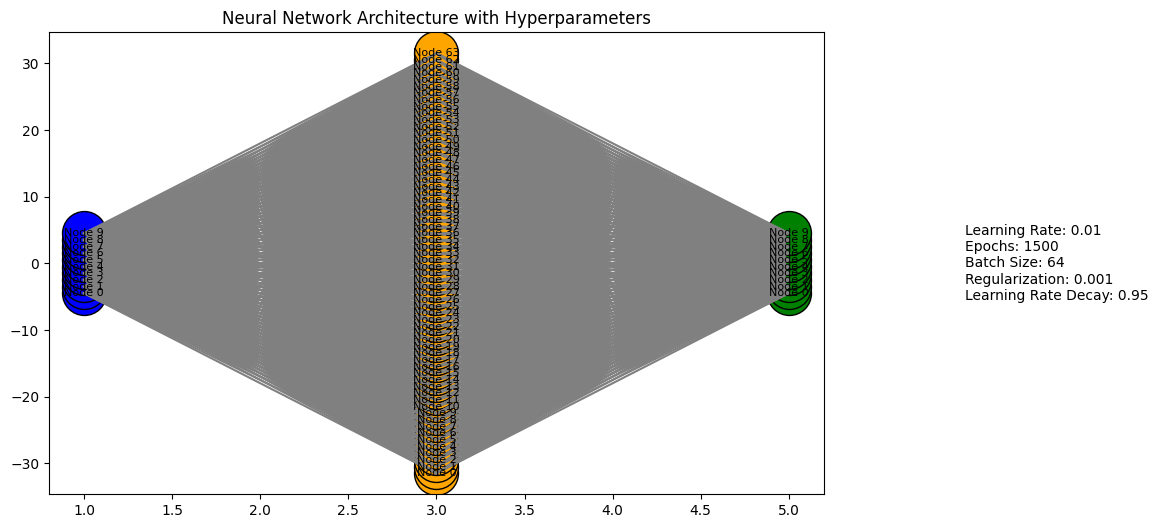

In [29]:
import matplotlib.pyplot as plt

# Define the neural network architecture
input_layer = 'Input Layer'
hidden_layer = 'Hidden Layer'
output_layer = 'Output Layer'

# Define the hyperparameters
hyperparameters = {
    'Learning Rate': 0.01,
    'Epochs': 1500,
    'Batch Size': 64,
    'Regularization': 0.001,
    'Learning Rate Decay': 0.95
}

# Create a visualization of the neural network with hyperparameters
plt.figure(figsize=(10, 6))
plt.title('Neural Network Architecture with Hyperparameters')

# Draw the nodes
layer_spacing = 2
node_spacing = 1
layer_1_nodes = 10  # Number of nodes in the input layer
layer_2_nodes = 64  # Number of nodes in the hidden layer
layer_3_nodes = 10  # Number of nodes in the output layer

# Draw connections between nodes
for i in range(layer_1_nodes):
    for j in range(layer_2_nodes):
        plt.plot([1, 3], [i * node_spacing - ((layer_1_nodes - 1) * node_spacing) / 2, j * node_spacing - ((layer_2_nodes - 1) * node_spacing) / 2], color='gray')

for i in range(layer_2_nodes):
    for j in range(layer_3_nodes):
        plt.plot([3, 5], [i * node_spacing - ((layer_2_nodes - 1) * node_spacing) / 2, j * node_spacing - ((layer_3_nodes - 1) * node_spacing) / 2], color='gray')

# Draw the nodes
for i in range(layer_1_nodes):
    plt.scatter(1, i * node_spacing - ((layer_1_nodes - 1) * node_spacing) / 2, color='blue', s=1000, edgecolors='black')
    plt.text(1, i * node_spacing - ((layer_1_nodes - 1) * node_spacing) / 2, f'Node {i}', ha='center', va='center', fontsize=8)

for i in range(layer_2_nodes):
    plt.scatter(3, i * node_spacing - ((layer_2_nodes - 1) * node_spacing) / 2, color='orange', s=1000, edgecolors='black')
    plt.text(3, i * node_spacing - ((layer_2_nodes - 1) * node_spacing) / 2, f'Node {i}', ha='center', va='center', fontsize=8)

for i in range(layer_3_nodes):
    plt.scatter(5, i * node_spacing - ((layer_3_nodes - 1) * node_spacing) / 2, color='green', s=1000, edgecolors='black')
    plt.text(5, i * node_spacing - ((layer_3_nodes - 1) * node_spacing) / 2, f'Node {i}', ha='center', va='center', fontsize=8)

# Add hyperparameters as text
hyperparams_text = '\n'.join([f'{k}: {v}' for k, v in hyperparameters.items()])
plt.text(6, 0, hyperparams_text, ha='left', va='center', fontsize=10)

plt.show()
